# Причины убытков приложения

Procrastinate Pro+ - развлекательное приложение. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель исследования** — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

**Предстоит изучить:**
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

**Ход исследования**

Исследование пройдет в 7 этапов:
1. Обзор данных;
2. Предобработка данных; 
3. Функции для расчета и анализа LTV, ROI, удержания и конверсии; 
4. Анализ данных; 
5. Маркетинг; 
6. Окупаемость рекламы; 
7. Вывод. 

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Читаем файлы `costs_info_short.csv`, `orders_info_short.csv` и `visits_info_short.csv`. Сохраняем их в переменные `costs`, `orders`, `visits` соответственно.

In [2]:
try: 
    costs, orders, visits = (
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки 
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий   
    )
except: 
    costs, orders, visits = (
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
    pd.read_csv('orders_info_short.csv'),  # покупки 
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
)

Выводим на экран первые 10 строк таблицы `costs_info_short.csv`, а также общую информацию о таблице:

In [3]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [4]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 3 столбца. Согласно документации к данным:
* `dt` - дата проведения рекламной кампании
* `Channel` - идентификатор рекламного источника
* `costs` - расходы на эту кампанию

В данных замечены следующие ошибки: 
1. Нарушение стиля в названиях колонок;
2. Неправильный тип данных в столбце `dt`.

Выводим на экран первые 10 строк таблицы `orders_info_short.csv`, а также общую информацию о таблице:

In [5]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 3 столбца. Согласно документации к данным:
* `User Id` - уникальный идентификатор пользователя
* `Event Dt` - дата и время покупки
* `Revenue` -  сумма заказа

В данных замечены следующие ошибки: 
1. Нарушение стиля в названиях колонок;
2. Неправильный тип данных в столбце `Event Dt`.

Выводим на экран первые 10 строк таблицы `visits_info_short.csv`, а также общую информацию о таблице:

In [7]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 6 столбцов. Согласно документации к данным:
* `User Id` - уникальный идентификатор пользователя
* `Region` - страна пользователя
* `Device` - тип устройства пользователя
* `Channel` - идентификатор источника перехода
* `Session Start` - дата и время начала сессии
* `Session End` - дата и время окончания сессии

В данных замечены следующие ошибки: 
1. Нарушение стиля в названиях колонок;
2. Неправильный тип данных в столбцах `Session Start` и `Session End`.

## Шаг 2. Предобработка данных

### 2.1 Стиль заголовков

In [9]:
costs.columns #выводим названия столбцов датафрейма costs

Index(['dt', 'Channel', 'costs'], dtype='object')

In [10]:
orders.columns #выводим названия столбцов датафрейма orders


Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [11]:
visits.columns #выводим названия столбцов датафрейма visits

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

Переименуем колонки таблиц в соответвие со 'змеиным регистром':

In [12]:
costs.columns = costs.columns.str.lower() #для таблицы costs

orders = orders.rename( #для таблицы orders
    columns={
        'User Id': 'user_id',
        'Event Dt': 'event_dt',
    }
)
orders.columns = orders.columns.str.lower()

visits.columns = visits.columns.str.lower()
visits = visits.rename(   #для таблицы visits
    columns={
        'user id': 'user_id',
        'session start': 'session_start',
        'session end': 'session_end', 
    }
)


### 2.2 Изменение типов данных 

Поменяем типы данных в столбцах `session_start`, `session_end`, `event_dt` и `dt` на тип `datetime`:

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### 2.3 Дубликаты

Для качества анализа данные необходимо проверить на дубликаты. Сначала займемся явными дубликатами.

In [14]:
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

Явных дубликатов нет, теперь проверим неявные дубкаты. Для этого выведем уникальные значения таблиц.

In [17]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [18]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [19]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [20]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Неявных дубликатов так же нет, так как нет повторяющихся значений.

### 2.4 Пропуски

Проверим датафреймы на пропуски

In [21]:
round((visits.isna().mean()*100),2)

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [22]:
round((orders.isna().mean()*100),2)

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

In [23]:
round((costs.isna().mean()*100),2)

dt         0.0
channel    0.0
costs      0.0
dtype: float64

**Вывод**

На этапе предобработки были исправлены следующие ошибки:
* стили заголовков;
* неверные типы данных.

Теперь можно приступить к следующему шагу.

## Шаг 3. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Функция для создания пользовательских профилей

In [24]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для расчёта удержания

In [25]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


Функция для расчёта конверсии

In [26]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта LTV и ROI

In [27]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функции для визуализации предыдущих метрик — `filter_data()`, `plot_retention()`, `plot_conversion()` и `plot_ltv_roi()`

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 4. Анализ данных

Получим профили пользователей

In [32]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей

In [33]:
min(profiles['first_ts'])

Timestamp('2019-05-01 00:00:41')

In [34]:
max(profiles['first_ts'])

Timestamp('2019-10-27 23:59:04')

Минимальная дата привлечения пользователей - 2019-05-01, максимальная - 2019-10-27

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
payers_region = pd.pivot_table(profiles, index='region', values='payer', aggfunc=['count', 'sum', 'mean']) #строим сводную таблицу
payers_region.columns = ['total', 'payers', 'fraction'] #переименуем столбцы
payers_region.sort_values(by='fraction', ascending=False) #выводим результат

,total,payers,fraction
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


Больше всего пользователей в США, платящих - в Великобртании. Доля платящих - в США и Германии.

Далее узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постром таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [36]:
payers_device = pd.pivot_table(profiles, index='device', values='payer', aggfunc=['count', 'sum', 'mean']) #строим сводную таблицу
payers_device.columns = ['total', 'payers', 'fraction'] #переименуем столбцы
payers_device.sort_values(by='fraction', ascending=False) #выводим результат

,total,payers,fraction
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


Больше всего пользователей используют iPhone, платящие тоже. Доля платящих пользователей по устройству больше у Mac и iPhone.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
payers_channel = pd.pivot_table(profiles, index='channel', values='payer', aggfunc=['count', 'sum', 'mean']) #строим сводную таблицу
payers_channel.columns = ['total', 'payers', 'fraction'] #переименуем столбцы
payers_channel.sort_values(by='fraction', ascending=False) #выводим результат

,total,payers,fraction
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


У большинства пользователей канал привлечения - organic, у платящих - FaceBoom. Доля платящих пользователей по каналу больше также у FaceBoom.

**Вывод**

Платящих пользователей больше всего в США. Также платящие пользователи в основном используют iPhone. Из каналов по платящим пользователям лидирует FaceBoom.

## Шаг 5. Маркетинг

Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим. 

In [38]:
profiles = profiles.query('channel != "organic"')

Посчитаем общую сумму расходов на маркетинг.

In [39]:
profiles['acquisition_cost'].sum()

105497.3

Всего на маркетинг потрачено 105497.3. Выясним, как траты распределены по источникам.

In [40]:
cost_channel = pd.pivot_table(profiles, index='channel',  values='acquisition_cost', aggfunc=['count', 'sum', 'mean']).reset_index() #строим сводную таблицу
cost_channel.columns = ['channel','count','sum_cost', 'mean_cost'] #переименуем столбцы
cost_channel.sort_values(by='mean_cost', ascending=False) #выводим результат


,channel,count,sum_cost,mean_cost
6,TipTop,19561,54751.30,2.799003
1,FaceBoom,29144,32445.60,1.113286
0,AdNonSense,3880,3911.25,1.008054
9,lambdaMediaAds,2149,1557.60,0.724802
7,WahooNetBanner,8553,5151.00,0.602245
5,RocketSuperAds,4448,1833.00,0.412095
4,OppleCreativeMedia,8605,2151.25,0.250000
8,YRabbit,4312,944.22,0.218975
3,MediaTornado,4364,954.48,0.218717
2,LeapBob,8553,1797.60,0.210172


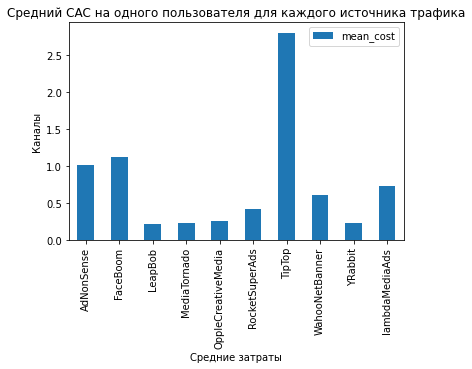

In [41]:
cost_channel.plot(x='channel', y='mean_cost', kind='bar')
plt.xlabel('Средние затраты')
plt.ylabel('Каналы')
plt.title('Средний CAC на одного пользователя для каждого источника трафика')
plt.show()

Самый большой САС у каналов TipTop, AdNonSense и FaceBoom.

In [42]:
profiles.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Общий CAC на одного пользователя для всего проекта - 1.127481.
Построим график динамики изменения трат на маркетинг во времени.

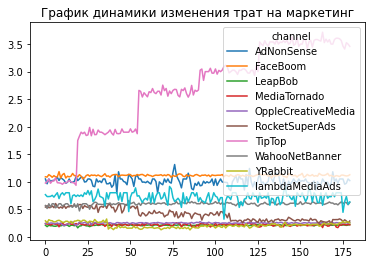

In [43]:
profiles.pivot_table(
        index='dt', columns='channel', values='acquisition_cost'
    ).reset_index().plot()
plt.title(
        'График динамики изменения трат на маркетинг'
        )

plt.show()

Траты на маркетинг для канала TipTop постоянно увеличиваются, для остальных же каналов траты распреддены равномерно.



**Вывод**

Лидирующие каналы: TipTop, FaceBoom и AdNonSense. Следует проанализировать их окупаемость.

## Шаг 6. Окупаемость рекламы

Установим момент и горизонт анализа данных. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
Момент: 1 ноября 2019 года, горизонт: 14 дней. Также включим в анализ органических пользователей.

In [44]:
observation_date = datetime(2019, 10, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Проанализируем общую окупаемость рекламы. Для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

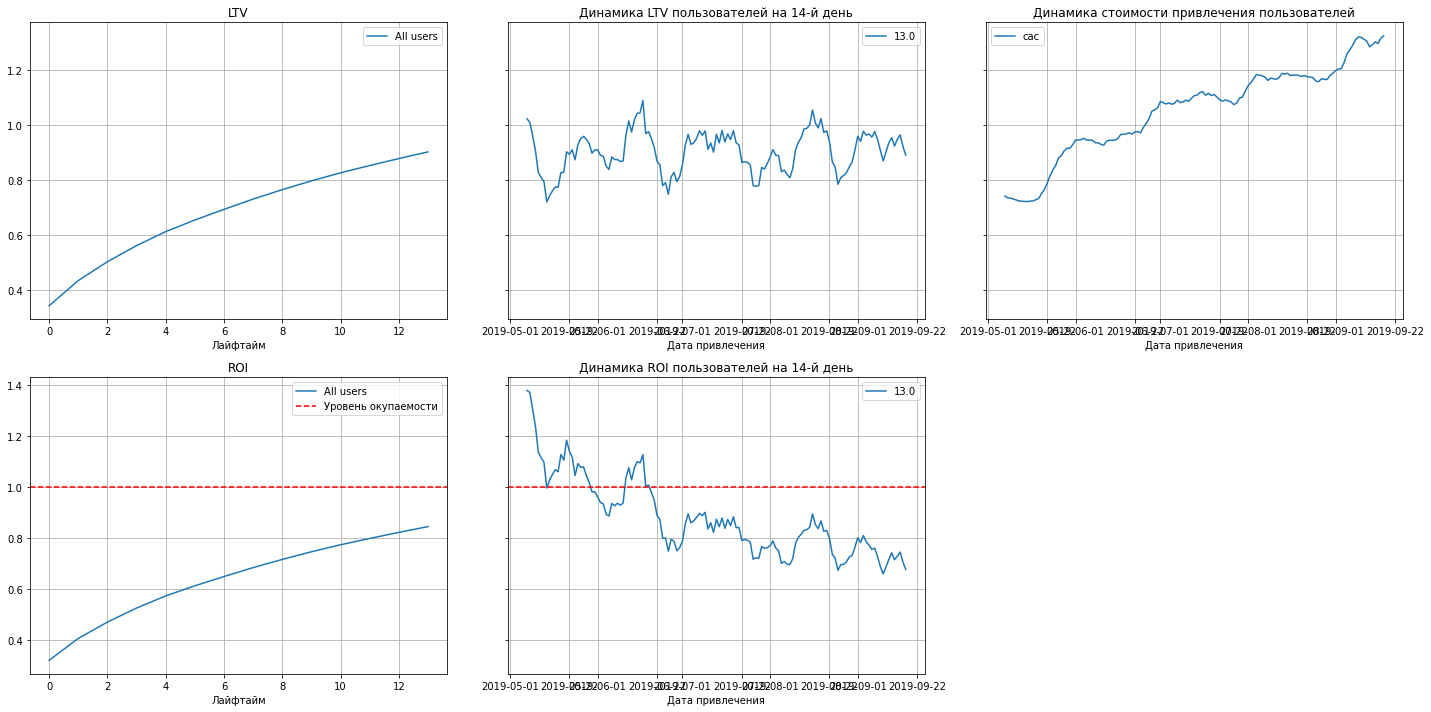

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
* Реклама окупается
* Рекламный бюджет постоянно увеличивается
* Динамика окупаемости инвестций снижается

Чтобы разобраться в причинах, пройдём по следующим характеристикам пользователей — стране и рекламным каналам.

Начнём с разбивки по странам: передадим параметру `dimensions` столбец `region`.

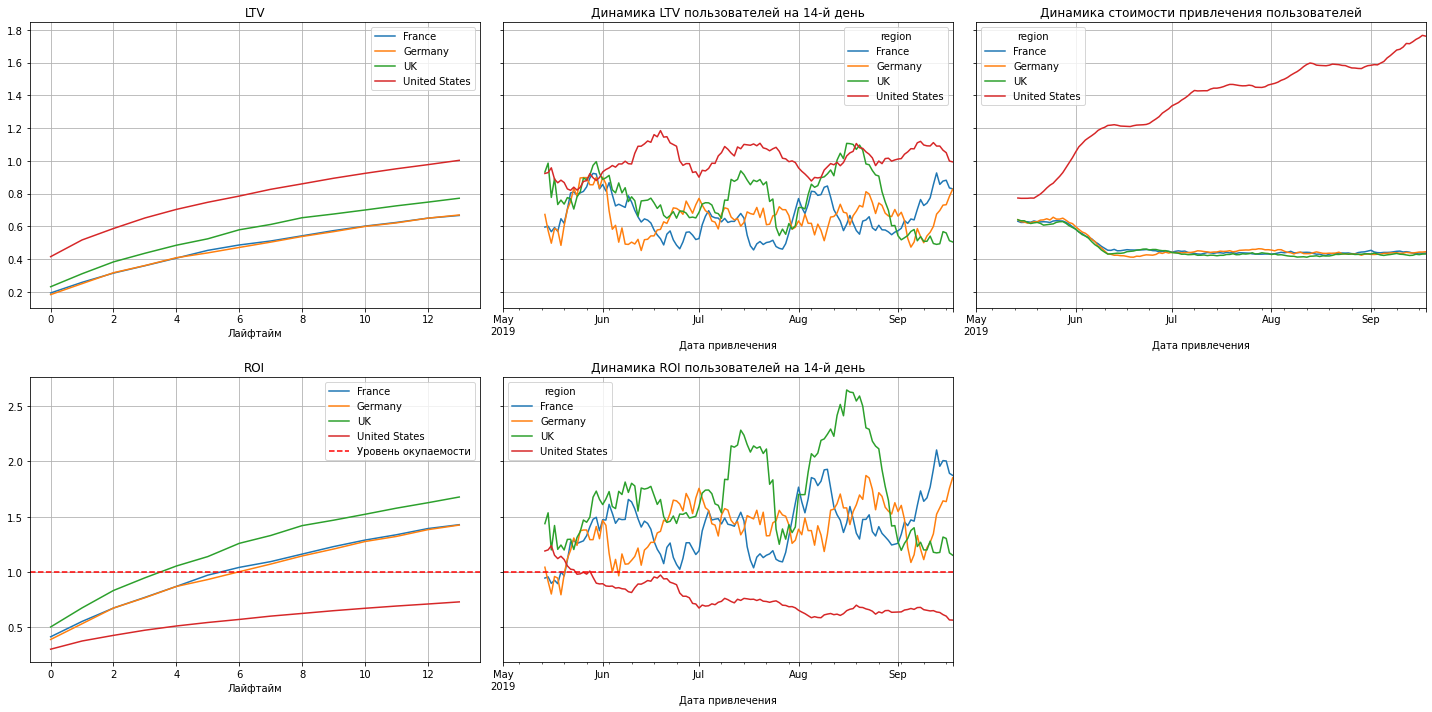

In [46]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:
* Реклама не окупается в США
* Динамика окупаемости постоянно снижается для США
* Динамика стоимости привлечения в США в несколько раз привышает остальные страны 

Теперь проверим источники привлечения (channel).

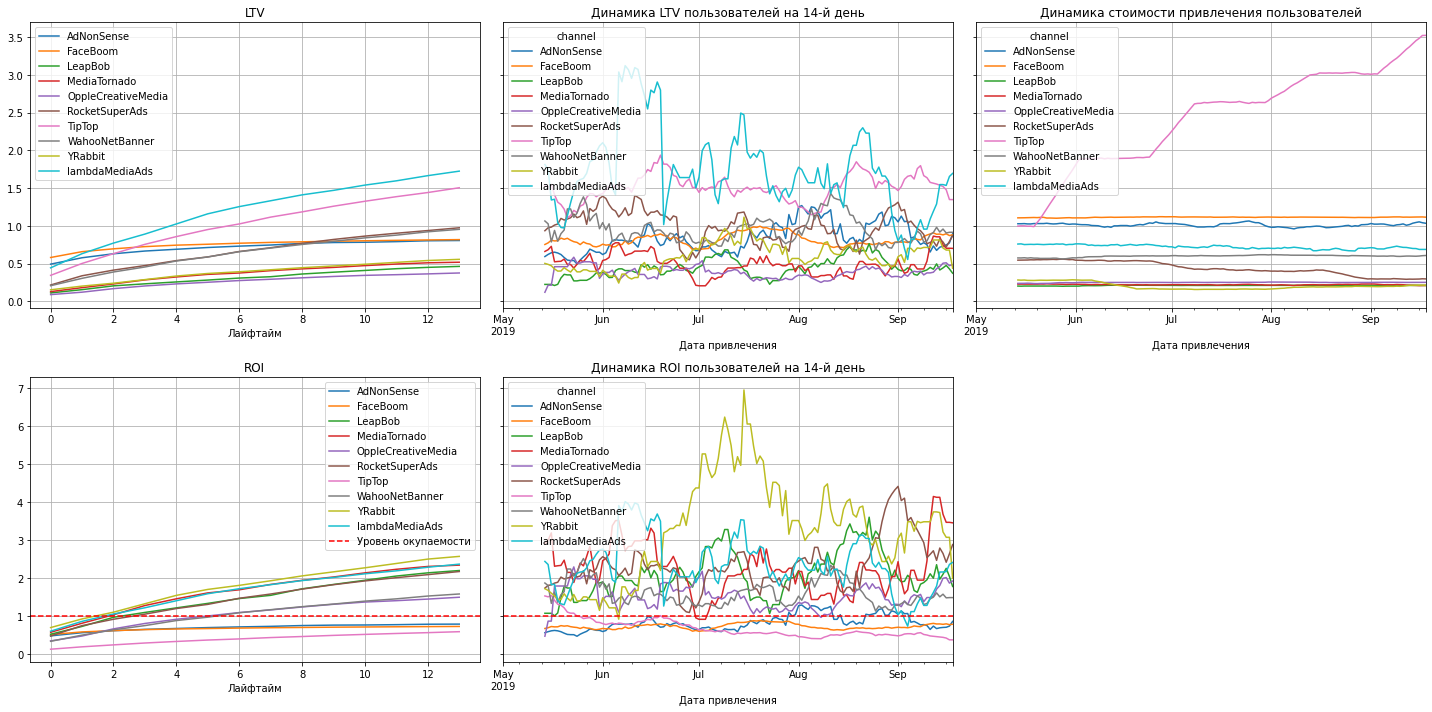

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Практически половина каналов привлечения не окупается. Подробнее стоит рассмотреть канал Tip Top, так как на его развите вкладывается много средств, но пользователи 'не доживают' до 14 дней, и он также не окупается.

Далее проверим устройства (device).

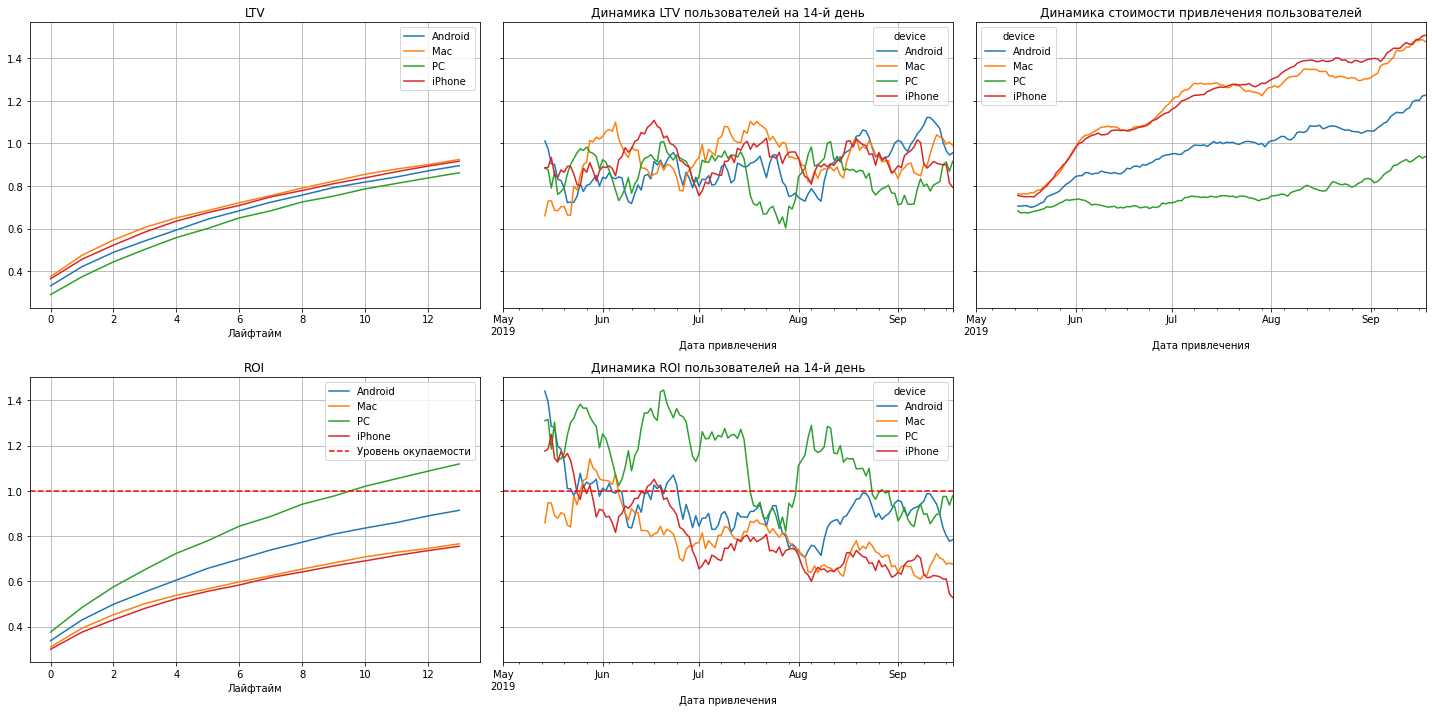

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается на большинстве устройствах, кроме PC, хоть и по нему привлекается не так уж  и много пользователей. Можно сделать вывод, что покупки с PC, в основном, совершают старые ппользователи.


Далее построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

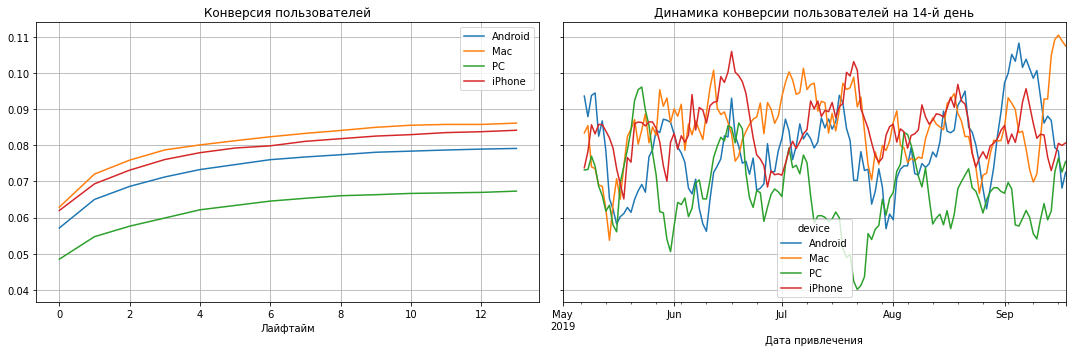

In [49]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

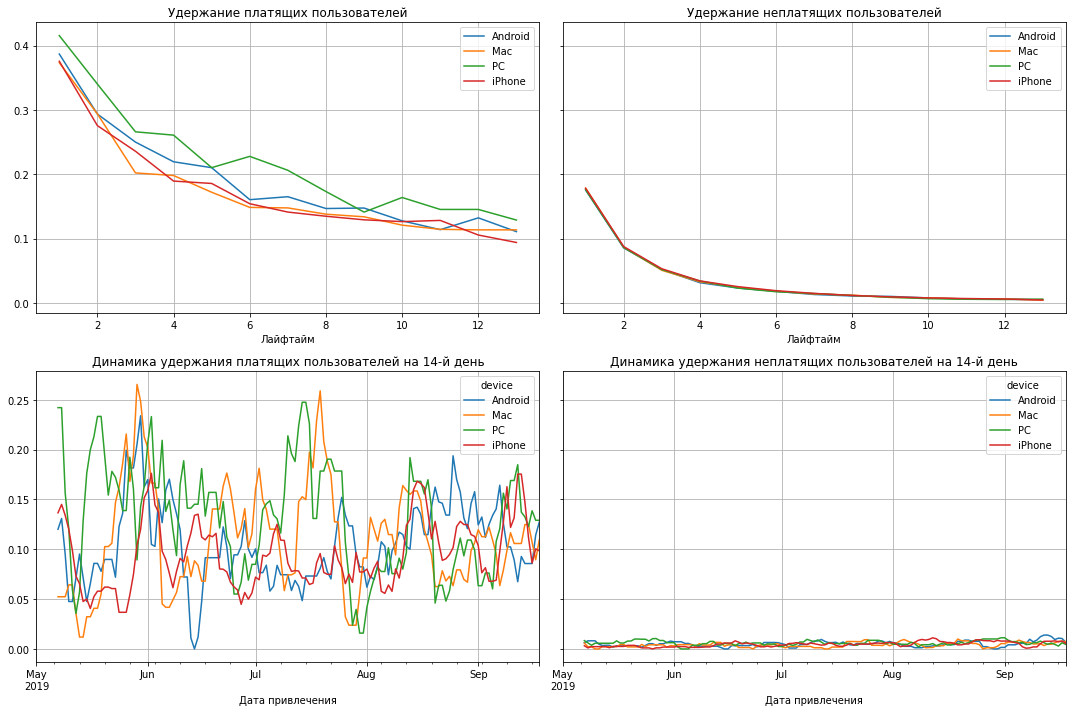

In [50]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Все устройства конвертируются и удерживаются очень хорошо

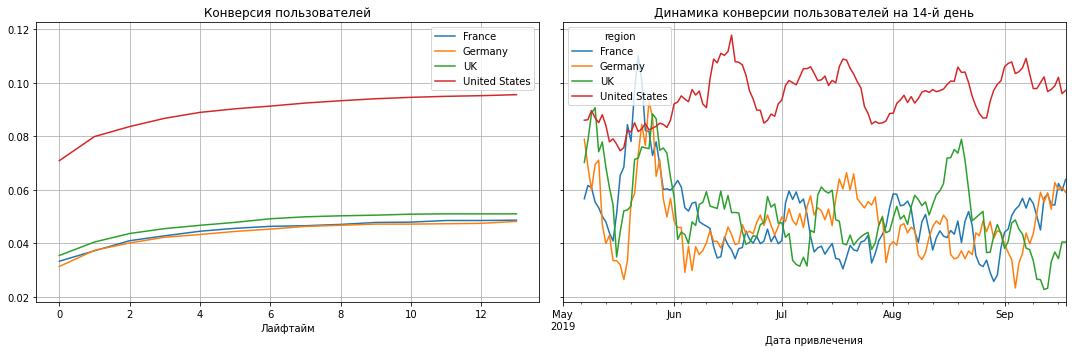

In [51]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

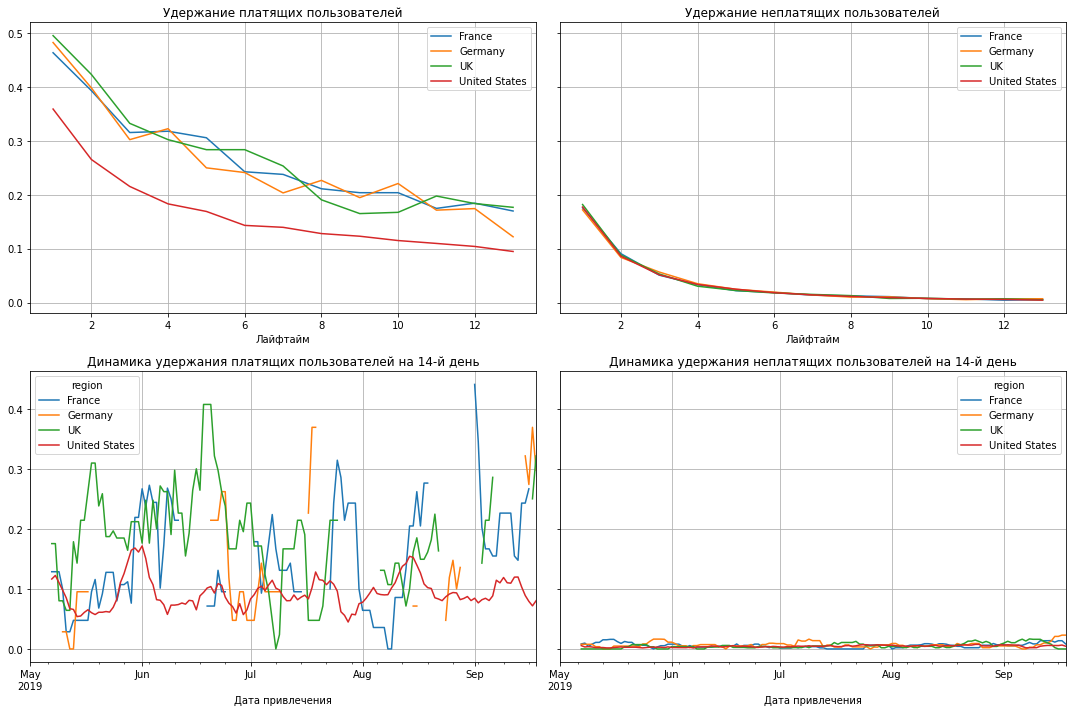

In [52]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей США самое маленькое, хоть и конверся самая высокая.

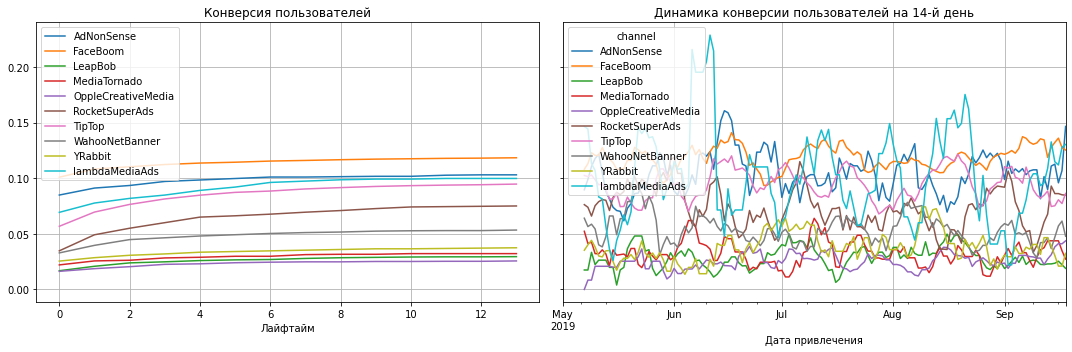

In [53]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

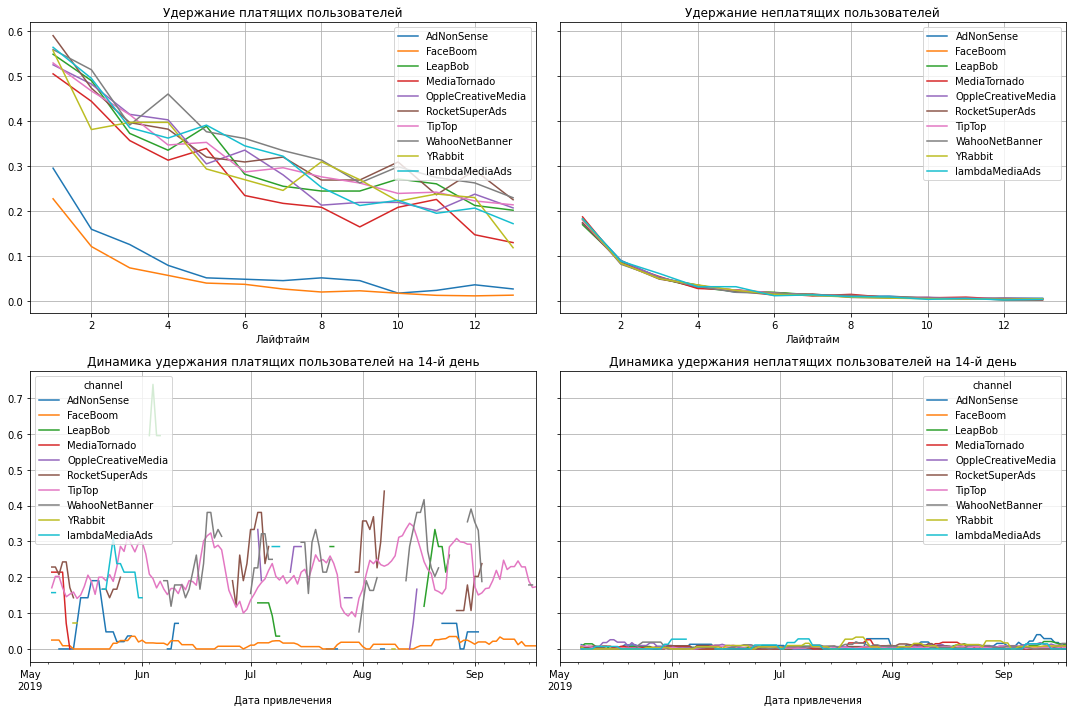

In [54]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Тоже самое повторяется и с каналом FaceBoom - высокая конверсия и низкое удержаниие.

**Вывод**

В целом, реклама окупается. 
Но такие платформы, как TipTop, FaceBoom и AdNonSense (они же были выявлены как лидирущие) снижают окупаемость рекламы. Также ее снижают пользователи США. 

Проблемы окупаемости могут быть вызваны неправильным распределением бюджета рекламы. Так, на лидирующе каналы поступает самое большое количество деенежных средств, которые не успевают окупаться. 

## Общий вывод

Причины убытков приложения возникают из-за:
* Проблем с рекламой в США(она не окупается  и ее динамика окупаемости постоянно снижается)
* Канала TipTop (на его развите вкладывается много средств, но пользователи 'не доживают' до 14 дней, и он также не окупается)
* Канала FaceBoom (высокая конверсия и низкое удержаниие)
* Устройств покупки (реклама не окупается на большинстве устройствах, кроме PC, хоть и по нему привлекается не так уж и много пользователей)

Одной из причины неэффективности привлечения пользователей является неправильное распределение рекламного бюджета. Есть смысл рассмотреть уменьшение бюджета рекламы в США и на платформах TipTop, FaceBoom и AdNonSense.

Рекомендованые каналы - YRabbit, lambdaMediaAds - их можно продолжать развивать.